<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D_%EC%B4%88%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# youtube 감성분석

## 파일 로드

In [1]:
with open('./data/0901_suka.txt', 'r') as f:
  a = f.read()
  print(a)

아[음악]wr여러분들 혹시 유튜버 나 스트림 하고싶으십니까유튜브에 스트리머 뭐 아니면 하이트뭐 등등 등등 뭐 웹툰작가 던 모던회사 때로 치고 나와서 뭘 해야지제가 얼마전에 건강검진을 받았는데요지금 차두리 형의 나오더라구요 거기에그 간 때문이야 간 때문이야 너 지금ct 촬영 받고 있습니다 건강조심하시고요 회사 다닐때는 나와서혼자 이런거 하면 되게 편하고 그럴거라고 생각하지만 나오시면 일이 2배줘 ep 2 두 배 벽 왠 차가 이세 배 입니다 3배에 운 없으면 은그 주 80시간 뭐 이렇게 일할 수있어요 조심하셔야 됩니다 조심하세요건강이 나라로 가고 있기 때문에 야이렇게 살면 안 되겠다 그래서안되겠다 고 대학생 들한테 좀물어봤어요 스퀄 도 나 혼자 춤의 팬드니까 너희들은 마이 디어 없냐 고대학생들이 라 그러면은 주무 살에서25 사이죠 물어봤어요 뜬 박스를통해서 혹시 마인이 없냐 모종 내나바라 그랬더니 우리 대학생들이자기들은 얘기하고 싶다 직접 와서모셔놓고 할 수 없으니까 자기들은얘기하고 싶다 라는 주제를보내줬습니다 저 20대의 20살25살 생각은 모르니까 걔들은 이얘기를 처음 봤거든요 보면서 문득해야 했는데 음 여러분도 한번 공감이되던지 벗어 이에게 공감이 되면여러분들의 마음은 대학생 거고요공감이 안 되면 마음이 슈카 인겁니다 자 m 제트 세대의세계관이라는 것이 존재한 야 이게무슨 소리냐 하면 램제트 세대가 늘린2월 제 3 알아 그러잖아요 이게축대 후반 거의 한 16세 에서마우스 투자를 사이인데 왜 뭉뚱그려서한 세대 라고 얘기를 하냐 너희들은md 트 세대의 세계관이 라는게자기가 보기엔 별로 없는데 공통점이없는데 아파트 안아파 아빠다 삼촌인데 40대에서 10 때까지 있는걸왜 이렇게 뭉뚱그려 얘기 아냐 란이런 얘길 하더라구요 그래서 그런가밖에 그런거라 생각이 들어서찾아봤더니 mgx 한 편의 시 탈은게 오늘 거에요 직접적으로 태그 바쓰알겠어 알겠어 비아 델 미안해 내가부르고 난 이집 아이템이 하단 데서봤는데 이 세대를 좀 본거죠 유명한폰 데어 페이 부머 그러면 연령별로짜르

## 문장 토큰화

In [2]:
!pip install kss

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 42.3 MB 403 kB/s eta 0:00:01
     |████████████████████████████████| 184 kB 66.9 MB/s eta 0:00:01
  Created wheel for kss: filename=kss-3.1.0.4-py3-none-any.whl size=42336592 sha256=384bb6c359b357a3952cf8589e5b8b159564c2d334e1899fb1cf221e6d9ea0ba
  Stored in directory: /home/lab21/.cache/pip/wheels/5d/6a/a0/e9efa10abf68593b74d1603ed5a9578adb6a6b4dfa41fc2f78
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=38b6cf757a1fdb32f1b45d442bc4e9ed2cc179db65e9b497ffa524e9c4fcb513
  Stored in directory: /home/lab21/.cache/pip/wheels/95/47/72/f881795ffd9e18eb43fddf72b498f768ecfe6e0c8b80015198
Successfully built kss emoji


In [4]:
pip install regex

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 745 kB 1.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import kss

[Korean Sentence Splitter]: Initializing Kss...


In [8]:
print(kss.split_sentences('너무 길면 하기 힘드나 보네.어우'))

['너무 길면 하기 힘드나 보네.', '어우']


## konlpy 사용

In [9]:
!pip install konlpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 19.4 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 9.3 MB/s  eta 0:00:01
     |████████████████████████████████| 448 kB 54.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 27.0 MB/s eta 0:00:01
     |████████████████████████████████| 146 kB 50.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 1.6 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from konlpy.tag import Okt

okt = Okt()

In [11]:
from collections import Counter
# 명사 토큰화
noun = okt.nouns(a)

for i, v in enumerate(noun):
  if len(v)<2:
    noun.pop(i)

In [12]:
cnt = Counter(noun)

In [13]:
noun_list = cnt.most_common(100) # 빈도수 기준 상위 100개
# for i in noun_list:  # 확인
#   print(i)

In [14]:
# 한글 폰트 다운
!apt-get update -qq
!apt-get install fonts-nanum* -qq

E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [27]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list # 폰트 위치 찾기

['/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Oblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Oblique.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/NanumGothic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf',
 '/usr/share/fonts/truetype/dejav

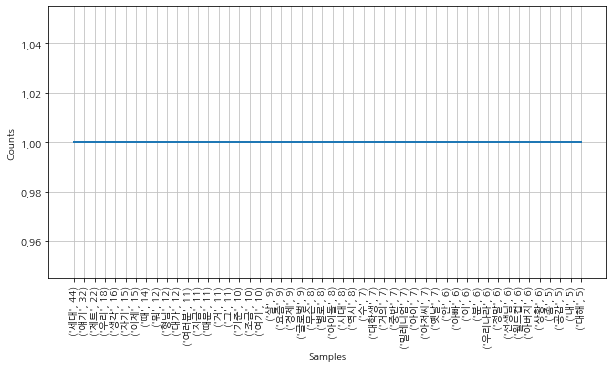

<function matplotlib.pyplot.show(close=None, block=None)>

In [28]:
import nltk
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')
path = '/usr/share/fonts/truetype/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [37]:
import pandas as pd

In [39]:
aa = pd.DataFrame(noun_list)

In [42]:
aa.columns = ['단어', '빈도']

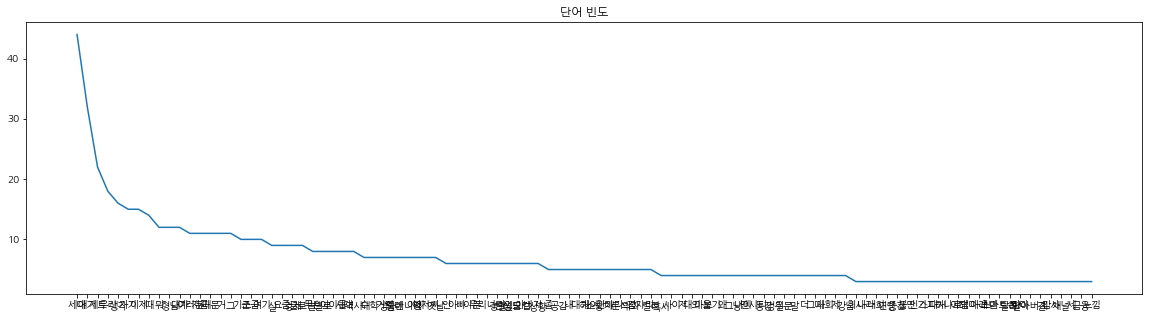

In [44]:
plt.figure(figsize=(20,5))
plt.title('단어 빈도')
plt.plot(aa['단어'],aa['빈도'])
plt.show()

In [23]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 366 kB 1.6 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


## 시각화- 워드클라우드

In [29]:
from wordcloud import WordCloud

wc = WordCloud(font_path = path,
               background_color='white',
               width = 150,
               height = 150,
               max_words = 100)

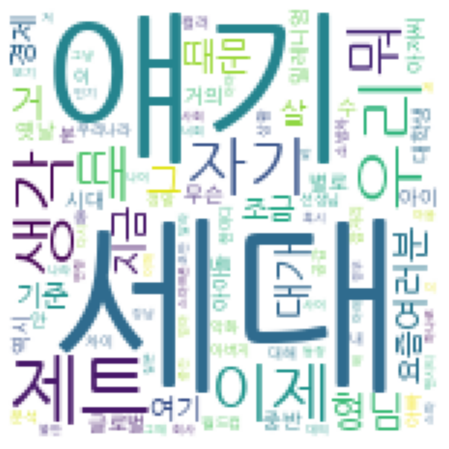

In [30]:
wc.generate_from_frequencies(dict(noun_list))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(wc)
plt.show()

## VADER 감성 어휘사전을 기반으로 한 감성분석

In [45]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
# polarity_score로 하나의 텍스트에 대해 각 부정/객관/긍정 그리고 총 합한 감성지수 출력(-1~1)
senti_score = senti_analyzer.polarity_scores(a)
print(senti_score)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lab21/nltk_data...


{'neg': 0.0, 'neu': 0.996, 'pos': 0.004, 'compound': 0.8442}


compound의 value값이 총 감성 지수

- 뉴스 데이터로 연습

In [86]:
import pymysql
import pandas

db = pymysql.connect(
    user='root', 
    passwd='1234', 
    host='3.35.70.166', 
    db='proj', 
    charset = 'utf8'
)

cursor = db.cursor(pymysql.cursors.DictCursor)

sql = "select * from news_craw where n_date"
cursor.execute(sql)

result = cursor.fetchall()

# 데이터 프레임으로 변경
df = pandas.DataFrame(result)

In [87]:
df.head()

,st_n,st_cd,news,n_date,title,url,text
0,삼성전자,5930,매일경제,2021083115,삼성전자-구찌 협업,http://news.mk.co.kr/newsRead.php?no=841058&ye...,삼성전자가 이탈리아 명품 브랜드 구찌와 함께 전용 디지털 애플리케이션(앱) '가옥 ...
1,삼성전자,5930,매일경제,2021083110,"""이정도일 줄 몰랐다""…플립·폴드 3 '역대급 돌풍'에 삼성전자 결단 내리나",http://news.mk.co.kr/newsRead.php?no=839245&ye...,[사진 제공 = 삼성전자] 갤럭시Z플립3와 Z폴드3 등 3세대 폴더블 스마트폰이 돌...
2,삼성전자,5930,매일경제,2021083017,"삼성전자, 3GPP 의장단 2석 추가 확보",http://news.mk.co.kr/newsRead.php?no=837909&ye...,5G(5세대) 이동통신 표준을 개발하는 3GPP(3rd Generation Par...
3,삼성전자,5930,매일경제,2021083122,"""떨어질 만큼 떨어졌나""…올해 삼성전자 20조 판 외국인 하루 3600억 사들였다",http://news.mk.co.kr/newsRead.php?no=842336&ye...,[사진 = 이충우 기자] 한동안 국내 증시 투톱인 삼성전자와 SK하이닉스를 '패닉셀...
4,삼성전자,5930,매일경제,2021083109,"""점유율 0.5% 굴욕 벗어나나""…삼성 폴더블 中 100만명 줄섰다",http://news.mk.co.kr/newsRead.php?no=839050&ye...,갤럭시Z 플립3. [사진 제공=삼성전자] 삼성전자가 중국에서 폴더블폰 신작을 내놓자...


In [49]:
senti_analyzer = SentimentIntensityAnalyzer()
# polarity_score로 하나의 텍스트에 대해 각 부정/객관/긍정 그리고 총 합한 감성지수 출력(-1~1)
senti_score = senti_analyzer.polarity_scores(df['text'][0])
print(senti_score)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score

# 임계치설정(보통 0.1)을 통해 compound(총 감성지수)가 임계치값보다 높으면 긍정, 낮으면 부정으로 분석
def get_sentiment(review, threshold):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    compound_score = scores['compound']
    final_sentiment = 1 if compound_score >= threshold else 0
    return final_sentiment

 # 각 텍스트 데이터에 위에서 설정한 감성 label 얻는 함수 적용하기
# 임계값은 0.1로 설정
df['vader_pred'] = df['text'].apply(lambda x : get_sentiment(x, 0.1))

# 원본 데이터에서 주어진 정답 label과 VADER로 예측한 label 비교
# y_target = review_df['sentiment']
# y_pred = review_df['vader_pred']

# print(confusion_matrix(y_target, y_pred))
# print("정확도 :", accuracy_score(y_target, y_pred))
# print("정밀도 :", precision_score(y_target, y_pred))
# print("재현율 :", recall_score(y_target, y_pred))
# print("F1 score :", f1_score(y_target, y_pred))

In [53]:
df['vader_pred'].value_counts() 

0    1621
1      31
Name: vader_pred, dtype: int64

- 대부분 부정의 결과가 나옴
- 주식용어가 부정인 점수가 많은것 같다... 다른 감성어휘 사전을 사용하거나 새롭게 만드는게 좋을 듯 싶다..

In [55]:
df.head()

,st_n,st_cd,news,n_date,title,url,text,vader_pred
0,삼성전자,5930,매일경제,2021083115,삼성전자-구찌 협업,http://news.mk.co.kr/newsRead.php?no=841058&ye...,삼성전자가 이탈리아 명품 브랜드 구찌와 함께 전용 디지털 애플리케이션(앱) '가옥 ...,0
1,삼성전자,5930,매일경제,2021083110,"""이정도일 줄 몰랐다""…플립·폴드 3 '역대급 돌풍'에 삼성전자 결단 내리나",http://news.mk.co.kr/newsRead.php?no=839245&ye...,[사진 제공 = 삼성전자] 갤럭시Z플립3와 Z폴드3 등 3세대 폴더블 스마트폰이 돌...,0
2,삼성전자,5930,매일경제,2021083017,"삼성전자, 3GPP 의장단 2석 추가 확보",http://news.mk.co.kr/newsRead.php?no=837909&ye...,5G(5세대) 이동통신 표준을 개발하는 3GPP(3rd Generation Par...,0
3,삼성전자,5930,매일경제,2021083122,"""떨어질 만큼 떨어졌나""…올해 삼성전자 20조 판 외국인 하루 3600억 사들였다",http://news.mk.co.kr/newsRead.php?no=842336&ye...,[사진 = 이충우 기자] 한동안 국내 증시 투톱인 삼성전자와 SK하이닉스를 '패닉셀...,0
4,삼성전자,5930,매일경제,2021083109,"""점유율 0.5% 굴욕 벗어나나""…삼성 폴더블 中 100만명 줄섰다",http://news.mk.co.kr/newsRead.php?no=839050&ye...,갤럭시Z 플립3. [사진 제공=삼성전자] 삼성전자가 중국에서 폴더블폰 신작을 내놓자...,0


In [54]:
# 유튜브 스크립트 감성 분석 결과 
senti_score = senti_analyzer.polarity_scores(a)
print(senti_score)

get_sentiment(a, 0.1)

{'neg': 0.0, 'neu': 0.996, 'pos': 0.004, 'compound': 0.8442}


1

## 자체 주식 감성어휘 사전으로 감성분석

In [72]:
# 간단한 긍부정 텍스트 모음 -- 기존 블로그에서 가져옴

with open("./negative_words_self.txt", encoding='utf-8') as neg:
    negative = neg.readlines()
negative = [neg.replace("\n", "") for neg in negative] 

with open("./positive_words_self.txt", encoding='utf-8') as pos:
    positive = pos.readlines()
positive = [pos.replace("\n", "") for pos in positive]


### 주식변동을 통해서 단어리스트를 가져옴

In [73]:
!pip install finance-datareader

Defaulting to user installation because normal site-packages is not writeable


In [77]:
df_1 = df.copy()

In [109]:
df_1['date_d'] = df['n_date'].str[:-2]
df_1['date_h'] = df['n_date'].str[-2:]

In [110]:
df_1.head()

,st_n,st_cd,news,n_date,title,url,text,vader_pred,date_d,date_h
0,삼성전자,5930,매일경제,2021083115,삼성전자-구찌 협업,http://news.mk.co.kr/newsRead.php?no=841058&ye...,삼성전자가 이탈리아 명품 브랜드 구찌와 함께 전용 디지털 애플리케이션(앱) '가옥 ...,0,20210831,15
1,삼성전자,5930,매일경제,2021083110,"""이정도일 줄 몰랐다""…플립·폴드 3 '역대급 돌풍'에 삼성전자 결단 내리나",http://news.mk.co.kr/newsRead.php?no=839245&ye...,[사진 제공 = 삼성전자] 갤럭시Z플립3와 Z폴드3 등 3세대 폴더블 스마트폰이 돌...,0,20210831,10
2,삼성전자,5930,매일경제,2021083017,"삼성전자, 3GPP 의장단 2석 추가 확보",http://news.mk.co.kr/newsRead.php?no=837909&ye...,5G(5세대) 이동통신 표준을 개발하는 3GPP(3rd Generation Par...,0,20210830,17
3,삼성전자,5930,매일경제,2021083122,"""떨어질 만큼 떨어졌나""…올해 삼성전자 20조 판 외국인 하루 3600억 사들였다",http://news.mk.co.kr/newsRead.php?no=842336&ye...,[사진 = 이충우 기자] 한동안 국내 증시 투톱인 삼성전자와 SK하이닉스를 '패닉셀...,0,20210831,22
4,삼성전자,5930,매일경제,2021083109,"""점유율 0.5% 굴욕 벗어나나""…삼성 폴더블 中 100만명 줄섰다",http://news.mk.co.kr/newsRead.php?no=839050&ye...,갤럭시Z 플립3. [사진 제공=삼성전자] 삼성전자가 중국에서 폴더블폰 신작을 내놓자...,0,20210831,09


In [111]:
df_1['date_d'] = pd.to_datetime(df_1['date_d'])

In [112]:
df_1.sort_values(by='date_d')

,st_n,st_cd,news,n_date,title,url,text,vader_pred,date_d,date_h
1251,카카오,35720,매일경제,2021080117,'디지털 매경'에 1309만 독자 꽂혔다,http://news.mk.co.kr/newsRead.php?no=743050&ye...,◆ 미디어 플랫폼 리더 매경 ◆ 매경미디어그룹은 신문·종합편성채널·경제방송·주간지·...,0,2021-08-01,17
291,삼성전자,5930,매일경제,2021080121,"""외국인 기관 9조 매물 받아냈다""…'사긴 사는데 꺼림칙' 개미 돌파구는…",http://news.mk.co.kr/newsRead.php?no=743682&ye...,"29일 서울 중구 을지로 하나은행 본점 딜링룸 현황판에 코스피 3,242.65포인트...",0,2021-08-01,21
1588,현대차,5380,매일경제,2021080117,지난달 개미 9조 샀지만…수익은 지지부진,http://news.mk.co.kr/newsRead.php?no=742856&ye...,개인투자자가 지난달 반도체와 전기차 관련주에 집중 투자했지만 손실을 봤던 것으로 ...,0,2021-08-01,17
1354,삼성바이오로직스,207940,매일경제,2021080111,"""그때 내가 왜 샀지"" 동학개미…지난달 9조 순매수, 줄줄이 마이너스",http://news.mk.co.kr/newsRead.php?no=742016&ye...,지난달 30일 오후 서울 중구 하나은행 본점 딜링룸에 이날 마감된 코스피가 표시돼 ...,0,2021-08-01,11
457,하이닉스,660,매일경제,2021080111,"""그때 내가 왜 샀지"" 동학개미…지난달 9조 순매수, 줄줄이 마이너스",http://news.mk.co.kr/newsRead.php?no=742016&ye...,지난달 30일 오후 서울 중구 하나은행 본점 딜링룸에 이날 마감된 코스피가 표시돼 ...,0,2021-08-01,11
...,...,...,...,...,...,...,...,...,...,...
1263,카카오,35720,매일경제,n,샤이니 민호 “12월 9일 생일이라 ‘머선129’ 출연”,http://star.mk.co.kr/new/view.php?mc=ST&year=2...,None,0,NaT,n
1265,카카오,35720,매일경제,n,글로벌 웹툰 스튜디오 '엠젯패밀리' 40억 규모 시리즈A 투자 유치,http://mirakle.mk.co.kr/view.php?year=2021&no=...,웹툰과 웹소설 등 다양한 콘텐츠를 유통·제작하는 스타트...,0,NaT,n
1273,카카오,35720,매일경제,n,"'거침마당' 박명수 “설운도 돌 수집 반대한 형수...2억짜리 돌에 박수""",http://star.mk.co.kr/new/view.php?mc=ST&year=2...,None,0,NaT,n
1278,카카오,35720,매일경제,n,"'라디오쇼' 이말년 “삼국지 되고 싶은 인물 없어...전쟁시대라 다 힘들어""",http://star.mk.co.kr/new/view.php?mc=ST&year=2...,None,0,NaT,n


In [117]:
df_2 = df_1[df_1['st_n'] == '삼성전자']

In [118]:
df_2 = df_2.dropna()

In [119]:
df_2.drop(columns = ['st_n', 'news','n_date', 'url'], inplace=True)

In [122]:
df_2 = df_2.sort_values(by='date_d')

In [123]:
df_2.head()

,st_cd,title,text,vader_pred,date_d,date_h
301,5930,지난달 개미 9조 샀지만…수익은 지지부진,개인투자자가 지난달 반도체와 전기차 관련주에 집중 투자했지만 손실을 봤던 것으로 ...,0,2021-08-01,17
328,5930,"""재테크하려면 지금 당장 가입하라""…증권사 전화 불나게 만든 상품은?",[사진 = 이승환 기자] 다양한 금융상품에 투자할 수 있고 세제 혜택도 있어 '만능...,0,2021-08-01,06
255,5930,"""가전제품이 20초에 한대씩 팔리다니""…50년의 기다림 끝에 대세됐다",LG전자가 1968년 국내 가전업계에서 처음 선보인 창문형 에어컨 `GA-111`....,0,2021-08-01,06
128,5930,"[단독] 삼성 현대차 SK 또 발등에 불…""제2사드보복 될라""",◆ 美 베이징올림픽 때리기 ◆미 백악관 [사진 출처 = 연합뉴스] 미국 의회와 인권...,0,2021-08-01,17
119,5930,'7만전자' 늪 빠진 '최고실적' 삼성전자…의미있는 점프 하려면,[출처 : 매일경제DB] 2분기 실적도 좋았고 3분기 전망도 좋은 삼성전자의 주가가...,0,2021-08-01,21


In [163]:
import datetime

In [165]:
df_2['date_i'] = df_2['date_d'] + datetime.timedelta(1)

In [166]:
import numpy as np

In [167]:
import FinanceDataReader as fdr

In [168]:
start_date = '20210731'  # 2011년 부터 10간의 데이터를 추출
end_date = '20210831'
sample_code = '005930'
stock = fdr.DataReader( sample_code, start = start_date, end = end_date )
stock.head(1)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-08-02,79200,79500,78700,79300,11739124,0.010191


In [169]:
stock = stock.reset_index()

In [170]:
stock.head()

,Date,Open,High,Low,Close,Volume,Change
0,2021-08-02,79200,79500,78700,79300,11739124,0.010191
1,2021-08-03,79400,81400,79300,81400,24339360,0.026482
2,2021-08-04,82200,83100,81800,82900,25642368,0.018428
3,2021-08-05,83300,83300,82000,82100,18485469,-0.009650
4,2021-08-06,81900,82500,81300,81500,13342623,-0.007308


In [171]:
s_1 = stock[['Date','Change']]

In [176]:
s_1.columns = ['date_i','change']

In [177]:
s_1.head(1)

,date_i,change
0,2021-08-02,0.010191


In [178]:
df_2.head(1)

,st_cd,title,text,vader_pred,date_d,date_h,date_i
301,5930,지난달 개미 9조 샀지만…수익은 지지부진,개인투자자가 지난달 반도체와 전기차 관련주에 집중 투자했지만 손실을 봤던 것으로 ...,0,2021-08-01,17,2021-08-02


In [179]:
df_3 = pd.merge(df_2,s_1,on='date_i')

In [180]:
df_3.head()

,st_cd,title,text,vader_pred,date_d,date_h,date_i,change
0,5930,지난달 개미 9조 샀지만…수익은 지지부진,개인투자자가 지난달 반도체와 전기차 관련주에 집중 투자했지만 손실을 봤던 것으로 ...,0,2021-08-01,17,2021-08-02,0.010191
1,5930,"""재테크하려면 지금 당장 가입하라""…증권사 전화 불나게 만든 상품은?",[사진 = 이승환 기자] 다양한 금융상품에 투자할 수 있고 세제 혜택도 있어 '만능...,0,2021-08-01,06,2021-08-02,0.010191
2,5930,"""가전제품이 20초에 한대씩 팔리다니""…50년의 기다림 끝에 대세됐다",LG전자가 1968년 국내 가전업계에서 처음 선보인 창문형 에어컨 `GA-111`....,0,2021-08-01,06,2021-08-02,0.010191
3,5930,"[단독] 삼성 현대차 SK 또 발등에 불…""제2사드보복 될라""",◆ 美 베이징올림픽 때리기 ◆미 백악관 [사진 출처 = 연합뉴스] 미국 의회와 인권...,0,2021-08-01,17,2021-08-02,0.010191
4,5930,'7만전자' 늪 빠진 '최고실적' 삼성전자…의미있는 점프 하려면,[출처 : 매일경제DB] 2분기 실적도 좋았고 3분기 전망도 좋은 삼성전자의 주가가...,0,2021-08-01,21,2021-08-02,0.010191


In [181]:
df_3['change'] = np.where(df_3['change'] > 0, 1,
                         np.where(df_3['change'] == 0, 0, -1))

In [182]:
df_3.columns

Index(['st_cd', 'title', 'text', 'vader_pred', 'date_d', 'date_h', 'date_i',
       'change'],
      dtype='object')

In [183]:
df_4 = df_3.drop(columns = ['st_cd', 'date_h'])

In [184]:
df_4.head()

,title,text,vader_pred,date_d,date_i,change
0,지난달 개미 9조 샀지만…수익은 지지부진,개인투자자가 지난달 반도체와 전기차 관련주에 집중 투자했지만 손실을 봤던 것으로 ...,0,2021-08-01,2021-08-02,1
1,"""재테크하려면 지금 당장 가입하라""…증권사 전화 불나게 만든 상품은?",[사진 = 이승환 기자] 다양한 금융상품에 투자할 수 있고 세제 혜택도 있어 '만능...,0,2021-08-01,2021-08-02,1
2,"""가전제품이 20초에 한대씩 팔리다니""…50년의 기다림 끝에 대세됐다",LG전자가 1968년 국내 가전업계에서 처음 선보인 창문형 에어컨 `GA-111`....,0,2021-08-01,2021-08-02,1
3,"[단독] 삼성 현대차 SK 또 발등에 불…""제2사드보복 될라""",◆ 美 베이징올림픽 때리기 ◆미 백악관 [사진 출처 = 연합뉴스] 미국 의회와 인권...,0,2021-08-01,2021-08-02,1
4,'7만전자' 늪 빠진 '최고실적' 삼성전자…의미있는 점프 하려면,[출처 : 매일경제DB] 2분기 실적도 좋았고 3분기 전망도 좋은 삼성전자의 주가가...,0,2021-08-01,2021-08-02,1


In [185]:
# 제목 토크나이징을 통해서 감성어휘 추가

# positive --> change == 1

df_pos = df_4[df_4['change'] == 1]['title']

In [186]:
for i in df_pos:
    ppp = okt.nouns(i)
    positive = positive + ppp

In [189]:
len(positive)

1622

In [192]:
df_na = df_4[df_4['change'] == -1]['title']

for i in df_na:
    ppp = okt.nouns(i)
    negative = negative + ppp

In [195]:
len(negative)

1436

In [194]:
Counter(negative)

Counter({'갑질': 1,
         '논란': 3,
         '폭리': 2,
         '허위': 1,
         '과징금': 2,
         '눈물': 1,
         '피해': 1,
         '포화': 1,
         '우롱': 1,
         '위반': 1,
         '리스크': 1,
         '사퇴': 1,
         '급락': 3,
         '하락': 5,
         '폐업': 1,
         '불만': 2,
         '산재': 1,
         '닫아': 1,
         '손배소': 1,
         '구설수': 1,
         '폐점': 1,
         '적발': 3,
         '침해': 1,
         '빨간불': 1,
         '취약': 1,
         '불명예': 1,
         '분신': 1,
         '구형': 1,
         '기소': 1,
         '반토막': 3,
         '호소': 1,
         '불매': 2,
         '냉담': 1,
         '문제': 2,
         '직격탄': 1,
         '한숨': 1,
         '불똥': 1,
         '항의': 2,
         '묵묵부담': 1,
         '싸늘': 1,
         '일탈': 1,
         '파문': 1,
         '게이트': 1,
         '횡령': 1,
         '사과문': 1,
         '여파': 1,
         '울상': 1,
         '초토화': 1,
         '급감': 1,
         '우려': 2,
         '중단': 1,
         '퇴출': 1,
         '해지': 1,
         '일베': 1,
         '이물질':